<font size=6>**ML Intro and Clustering**</font> </h6>

In this session we provide a short introduction to **Machine Learning**. We also present what one major application **Clustering** through a simple example. <br>
The goals are:

- to get a grasp of what **machine learning** is 
- to show the basic concept of **data exploration** and **interpretetion**


# A bit of introduction to ML

## What is machine learning ?

Arthur Samuel (1959): 

>*"Field of study that gives computers the ability to learn without being explicitly programmed."*

## How did we get here? 

<center><<img src="images/ml_history.png" width=800> 
    Figure 1.1. Timeline from Artificial Intelligence, to Machine Learning, and Deep learning.<br>
(Credit: <a href="https://blogs.nvidia.com/blog/2016/07/29/whats-difference-artificial-intelligence-machine-learning-deep-learning-ai/" target="_blank" rel="noopener noreferrer"> Nvidia blog - (an interesting read!</a>)</center>

## and ... why now? 

- More powerful, abundant, and cheap computation (CPUs/GPUs).
- Growing data sets.
- Advancements in underlying algorithms and implementation.

This is true for both everyday and Astronomy applications !

## ML branches

<center><<img src="images/ml_branches.png" width=800> 
Figure 2.1. Branches and example applications of Machine Learning<br>
(Credit: <a href="https://www.cognub.com/index.php/cognitive-platform/"
 target="_blank" rel="noopener noreferrer"> CogHub</a>)</center>

- **Supervised**: Labelled data where the algorithms learn to predict the output from the input data.
- **Unsupervised**: Non-labelled data where the algorithms learn to identify structures from the input data.
- **Semi-supervised**: Some labelled data - most is not - and a mixture of supervised and unsupervised techniques can be implemented.

## Unsupervised approaches in particular:

- Clustering: discover groupings or/and structures in the data, i.e. concentrations of datapoints or overdensities (e.g. the locations of galaxies in a BPT diagram)
- Association:  discover the rule(s) describing between variables or features in a dataset (e.g. customer recommendations)
- Dimentionality reduction: tool to reduce the number of input variables or features in a dataset (the more you have the more challenging it becomes to build a predictive model - referred to as *curse of dimentionality*) - also usefulf for visualization purposes.  

## Pros 
+ They can make new discoveries, as often enough we don’t know what they’re looking for in data.
+ They do not require training, which saves (huge) time on producing labels (manual classification tasks such as spectroscopic classification).
+ It reduces the chance of human error and bias, which could occur during manual labeling processes.
+ Unlabeled data is much easier and faster to get.<br>

## Cons
- Output needs careful proper interpretation: 
    - the groups may not match informational classes
    - extra effort has to be made to validate the groups. 
- Less accurate predictive results, as the labels are not part of the process and the method has to learn it by itself. 
- More time is needed to train these algorithms:
    - they need time to analyze and calculate all possibilities
    - the deal with huge datases that may increase computational complexity.


## The most critical take-home points:

- No matter which algorithm you pick, the goal of ML is to make **predictions** and **classifications**.
- There is **no optimal** algorithm, it all depends on your specific problem!<details>
<summary>( Click for an illustration of this point )</summary>
<center><img src="images/my-precious-not.jpg"> 
Figure 3.1. There is not a single algorithm to rule them all !!!<br>
(Credit: <a href="https://knowyourmeme.com/memes/my-precious"
 target="_blank" rel="noopener noreferrer"> knowyourmeme.com</a>)</center>
</details>




# Clustering


    or: "What can data tell us ?"

## Selecting a tool - the K-means algorithm

The K-means algorithm tries to partition a sample of N observations (with each observation being a $d$-dimensional vector) into $k$ individual clusters $C_k$. 

We first need to find a metric, i.e. to define the **loss function**, which (in this case) is the within-cluster sum-of-squares of the observations:

$$ Loss = \sum_{k=1}^{K} \sum_{i \epsilon C_k} ||x_i-\mu_k||^2$$,

where $\mu_k=\frac{1}{N_k}\sum_{i \epsilon C_k} x_i$ is the mean/centroid of the $N_k$ points included in each of the $C_k$ clusters. 

The solution comes from **minimizing** the above function, i.e.: 

$$ min (Loss) = \min_{\mu_k} \left (  \sum_{k=1}^{K} \sum_{i \epsilon C_k} ||x_i-\mu_k||^2 \right )$$. 

**IMAGE BEFORE OR AFTER ?**

<center><<img src="images/kmeans.gif"> 
Figure 5.1. Evolution of K-means centroids through iterations. <br>
(Credit: <a href="https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/"  target="_blank" rel="noopener noreferrer">Clustering with Scikit with GIFs, by David Sheehan</a>)</center>

**Steps**:
1. Initiate algorithm by selecting $k$ means <br>
    *e.g. select randomly $k$ observations as initial means - see also [Wiki:K-means initialization](http://en.wikipedia.org/wiki/K-means_clustering#Initialization_methods)*
2. Assign each observation to the nearest cluster
3. Calculate the new mean value for each cluster $C_k$ according to the new observations assiged
4. Repeat steps 2 and 3 up to the point that there are no updates in the assigments to the clusters.

A globally optimal minimum is not guaranteed (might converge to a local minimum). This is highly dependent on the initialization of the centroids. This is why, in practice, K-means is run multiple times with different starting values selecting the result with the lowest sum-of-squares error. To improve on that we can initially select centrodis that are generally distant from each other (sklearn implementation by using `init='k-means++'` parameter). For more see [Grouping data points with k-means clustering, by Jeremy Jordan](https://www.jeremyjordan.me/grouping-data-points-with-k-means-clustering/).

**Complexity**

$O(knT)$, where k, n and T are the number of clusters, samples and iterations, respectively.

**Pros**

- Simple and intuitive

**Cons**

- The number of clusters (K) must be provided (or cross-validated)
- There is an inherit assumption of isotropic clusters (i.e. not well fitted for elongated clusters, or manifolds with irregular shapes)
- Inertia is not a normalized metric: lower values are better , but as the dimensions increase so does the inertia

An alternative for faster implementation - Mini Batch K-means

For faster computations the sklearn offers the [Mini Batch K-means](http://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans) method which simply breaks the initial set of observations/data points to smaller randomly selected subsamples.

For each subsample in the mini batch the assigned centroid is updated by taking into account the average of that subsample and all previous subsamples assigned to that centroid. This is repeated until the predefined number of iterations is reached. Its results are generally only slightly worse then the standard algorithm.

## An example from stellar sources

The following dataset originates from measurements of two spectral lines for a sample of stars. The strength of a spectral line can be measured by its equivalent width (EQW).  

<div style="text-align: center;">
<img src="images/equivalent_width-wiki.jpg"> 
Figure 12.1. Defining EQW: the width of a line with intensity equal to the local continuum and total flux equal to that of the line.   <br>
(Credit: <a href="https://en.wikipedia.org/wiki/Equivalent_width" 
 target="_blank" rel="noopener noreferrer">Wikipedia: Equivalent Width, by Szdori </a>)
    </img>
    </div>

Therefore, the larger the EQW the stronger the line is. The presence of spectral lines depends on the temperature of the stellar sources. Because of this, we see a developmet of different spectral lines as we move from the hottest to the cooler stars. This corresponds to moving from earlier spectral types (O-type stars; 50-25kK) to later ones (M-type; 3.5-2.5kK) [see the Morgan-Keenan spectral classification scheme](https://en.wikipedia.org/wiki/Stellar_classification)].

In [78]:
import sys
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 18}) # updating font size
from matplotlib import colors
import warnings
warnings.filterwarnings(action='ignore')

def flospecConv(arg):
    """
    Function to convert from spectral types to 
    float numbers (e.g. B0,O9.5 to 20.0,19.5)
    and backwards.
    """ 
    try:
        float(arg)
        if str(arg)[0]=='1':
            sp = 'O'
        elif str(arg)[0]=='2':
            sp = 'B'
        elif str(arg)[0]=='3':
            sp = 'A'
        else:
            sys.exit(' ! ERROR: more than O/B stars! Adjust conversion function.')
        new_arg = sp+str(arg)[1:]
    except ValueError:
        if arg[0]=='O' or arg[0]=='o':
            fl = '1'
        elif arg[0]=='B' or arg[0]=='b':
            fl = '2'
        elif arg[0]=='A' or arg[0]=='a':
            fl = '3'
        else:
            sys.exit(' ! ERROR: Check input! If more than O/B stars adjust conversion function.')
        new_arg = float(arg.replace(arg[0],fl))

    return new_arg


In [79]:
# Reading the data file and selecting lines
# when selecting lines do it in pairs, and with shorter line first

PATH_data = "data/stellar_types.dat"

sellines = ['HeII/4200', 'HeI/4471'] # in order of wavelength

stars=defaultdict(list)
with open(PATH_data,'r') as inf:
    for line in inf:
        cols = line.split()
        objt = cols[0]
        spln = cols[1]
        if spln in sellines: 
#            print(splin)
            eqw = cols[2]
            stars[objt].append(eqw)             # the shorter line is appended first!
            
#print(stars)

# Creating data structures:

sptype, flosptype, eqwA, eqwB = [], [], [], []
for s in stars.keys():
    sptype.append(s.split('-')[0])
    flosptype.append(flospecConv(s.split('-')[0]))
    eqwA.append(float(stars[s][0]))                 # A is the shorter line
    eqwB.append(float(stars[s][1]))                 # B is the other line (obviously!)
    
# > Organizing data in an analysis-ready fashion:
X = np.column_stack((eqwA,eqwB))

print('Sample shape:')
print("___________________________________")
print('  X  | ' + str(X.shape))
print('     | ' + str(X.shape[0]) + ' samples x ' + str(X.shape[1]) + ' diagnostics' )

Sample shape:
___________________________________
  X  | (697, 2)
     | 697 samples x 2 diagnostics


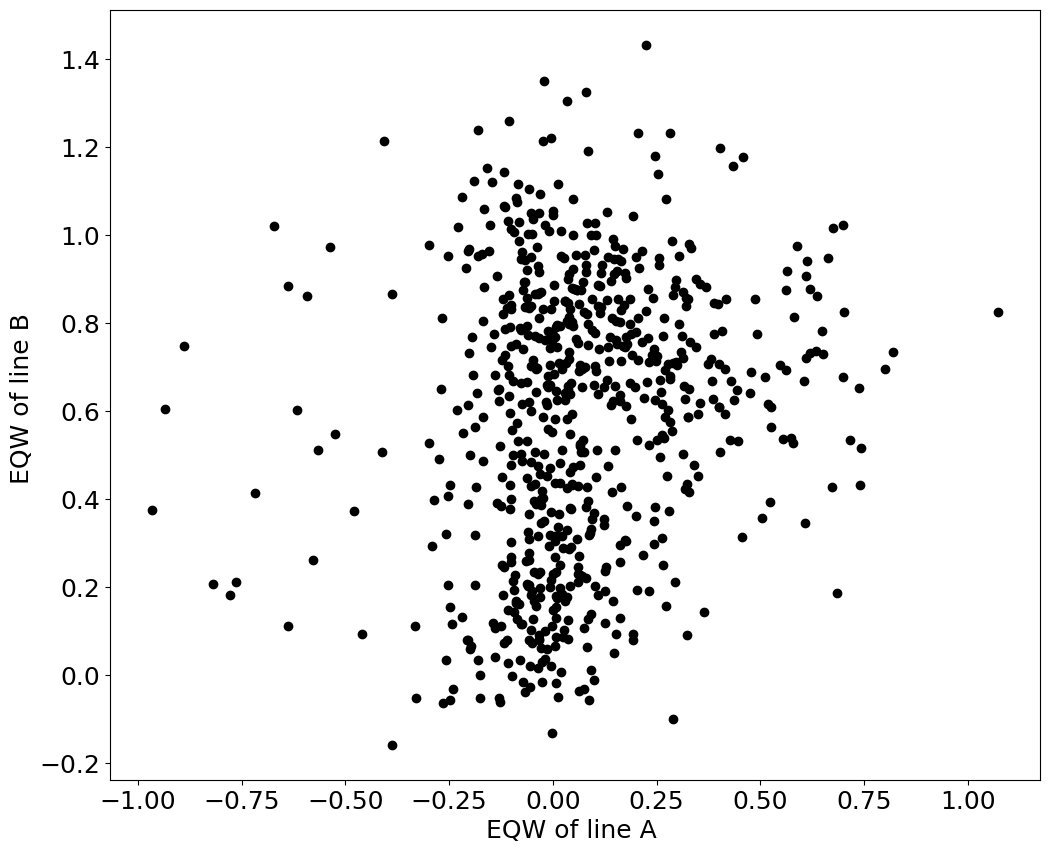

In [80]:
# PLOTTING

fig = plt.figure(figsize=(12,10)
                )
scat = plt.scatter(eqwA, eqwB, c='k')
# cb = plt.colorbar(scat, ticks=[15,22,29])   # range of available spectral types
# cb.set_ticklabels(['O5','B2','B9'])
# cb.set_label('Spectral Types')

plt.xlabel(r"EQW of line A ")
plt.ylabel(r"EQW of line B ")
plt.show()

_**Question**: So, how many clusters can you identify?_
<br>
Make a sketch of what YOU think!

Now let's try the clustering algorith to see what we get... 

## TASK : change the values and make a note of the outputs

Cluster centers:
[[-0.00749765  0.54657569]
 [ 0.01881435  0.91863139]
 [-0.0159055   0.15186048]
 [ 0.42132856  0.6945392 ]
 [-0.67356546  0.52196501]]


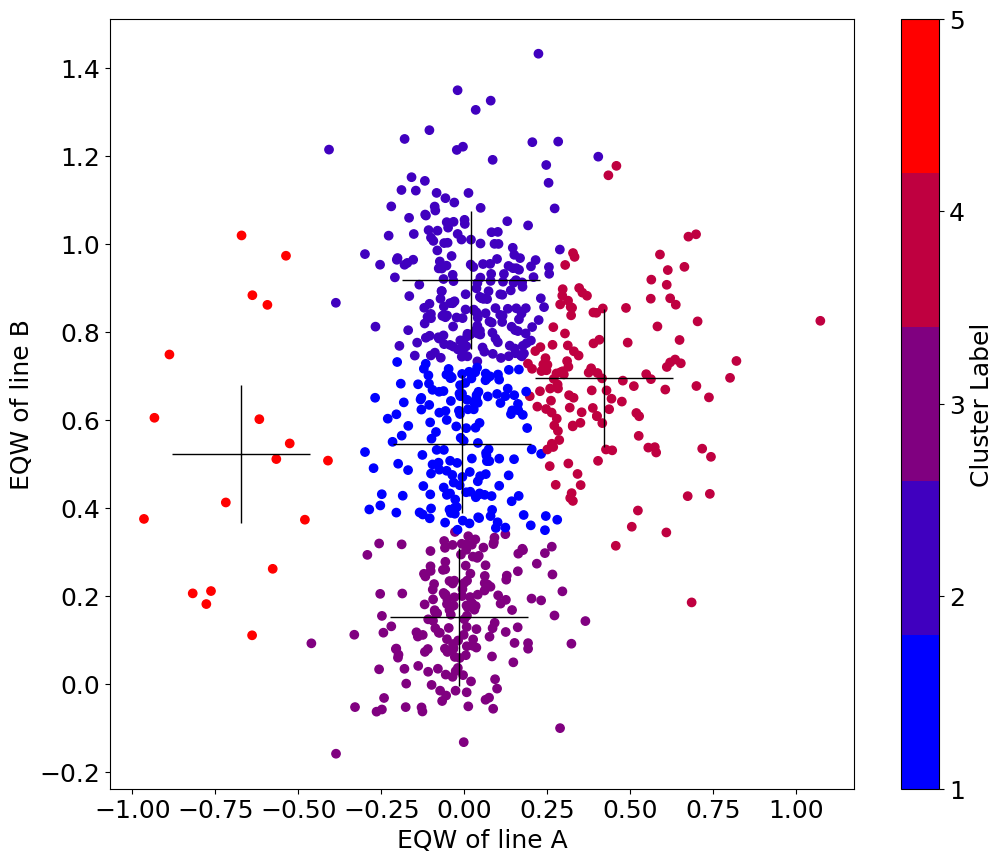

In [81]:
from sklearn.cluster import KMeans
import matplotlib

Clusters_kmeans = 5

kmeans_model = KMeans(n_clusters=Clusters_kmeans, random_state=0)
kmeans_model.fit(X)

print("Cluster centers:")
print(kmeans_model.cluster_centers_)

cc_x = kmeans_model.cluster_centers_[:,0]
cc_y = kmeans_model.cluster_centers_[:,1]

fig = plt.figure(figsize=(12,10))

plt.plot(cc_x, cc_y, 'k+', ms=100)

new_map = matplotlib.cm.gray.from_list('whatever', ('blue', 'red'), N=Clusters_kmeans)
scat2 = plt.scatter(ewHeII, ewHeI, c=kmeans_model.labels_, edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat2, ticks=range(0,Clusters_kmeans+1,1))   # number of clusters
cb.set_ticklabels(range(1,Clusters_kmeans+2,1))
cb.set_label('Cluster Label')

plt.xlabel(r"EQW of line A")
plt.ylabel(r"EQW of line B")

# plt.ylabel(r"EQW of HeI $\lambda$4471 ")
# plt.xlabel(r"EQW of HeII $\lambda$4200 ")

plt.show()

_**Question**: How does the algorithm performs wrt your guess ?_ 

_HINT_: this highly depends on the number of clusters you input and selected by visual inspection.
<br>

_**Question**: What can you say about the results if you start increasing the number of clusters?_

<br>
<details>
<summary>Click for answer</summary>
In the case of 2 clusters we see that the grouping is done based on the EQW of line B mainly. 
In the case of 3 clusters we notice that line A stars to contribute. 
If we start increasing the number of clusters we run into the problem of properly interpreting the results. In other words, we need to understand if these groupings correspond to physical gorups or not. This is exactly the point where interpretation of the resuls is needed. 
</details>

Let's take a look on the actual data now!

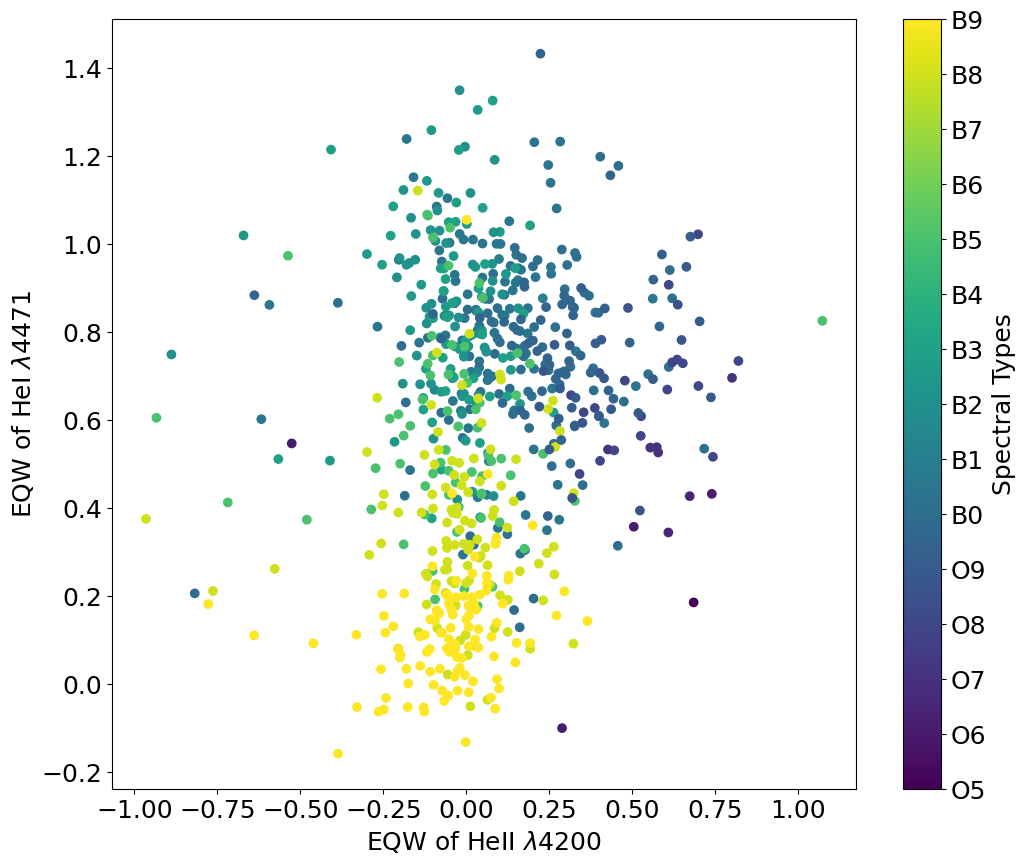

In [72]:
# PLOTTING

fig = plt.figure(figsize=(12,10)
                )
scat = plt.scatter(eqwA, eqwB, c=flosptype, edgecolors='face', cmap="viridis")

# plotting all spectral types
specrange = np.arange(15,30,1)
cb = plt.colorbar(scat, ticks=specrange)   # range of available spectral types
cb.set_ticklabels([flospecConv(a) for a in specrange])
# or if you want to present a smaller or indicative number of types
# cb = plt.colorbar(scat, ticks=[15,22,29])   # range of available spectral types
# cb.set_ticklabels(['O5','B2','B9'])
cb.set_label('Spectral Types')

plt.xlabel(r""+f"EQW of { sellines[0].split('/')[0]} $\lambda${sellines[0].split('/')[1]}")
plt.ylabel(r""+f"EQW of { sellines[1].split('/')[0]} $\lambda${sellines[1].split('/')[1]}")

plt.show()

_**Question**: Given this information how can you interpret the previous results?_
    
<br>
<details>
<summary>Click for answer</summary>
In the case of 2 clusters we see that the grouping is done based on the EQW of HeI 4471 line, which is able to separate the sample into late B-type stars (cooler) and early B-types plus O-types (hotter). 
If we consider 3 clusters then the HeII line 4200 helps to separate the early-B types from the (hotter) O-type stars.
A larger number of clusters will only perplex the image. 
</details>



&#9755; You will see more advanced techinques on data visualization in the **ML_Practices** session.

# 4. Clustering algorithms overview

We start by presenting a set of [**sklearn clustering**](http://scikit-learn.org/stable/modules/clustering.html) algorithms with toy datasets, and then we continue by applying some of them in various astrophyiscal datasets.

This serves as a showcase of the available methods and how they compare. You can easily adapt any of these methods to the following examples or your own problems. 

In [82]:
# Generate toy dataset

from sklearn import datasets
# Ignore sklearn warnings (remove when ready!):
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

np.random.seed(0)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

In [83]:
# Setting up clustering parameters

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

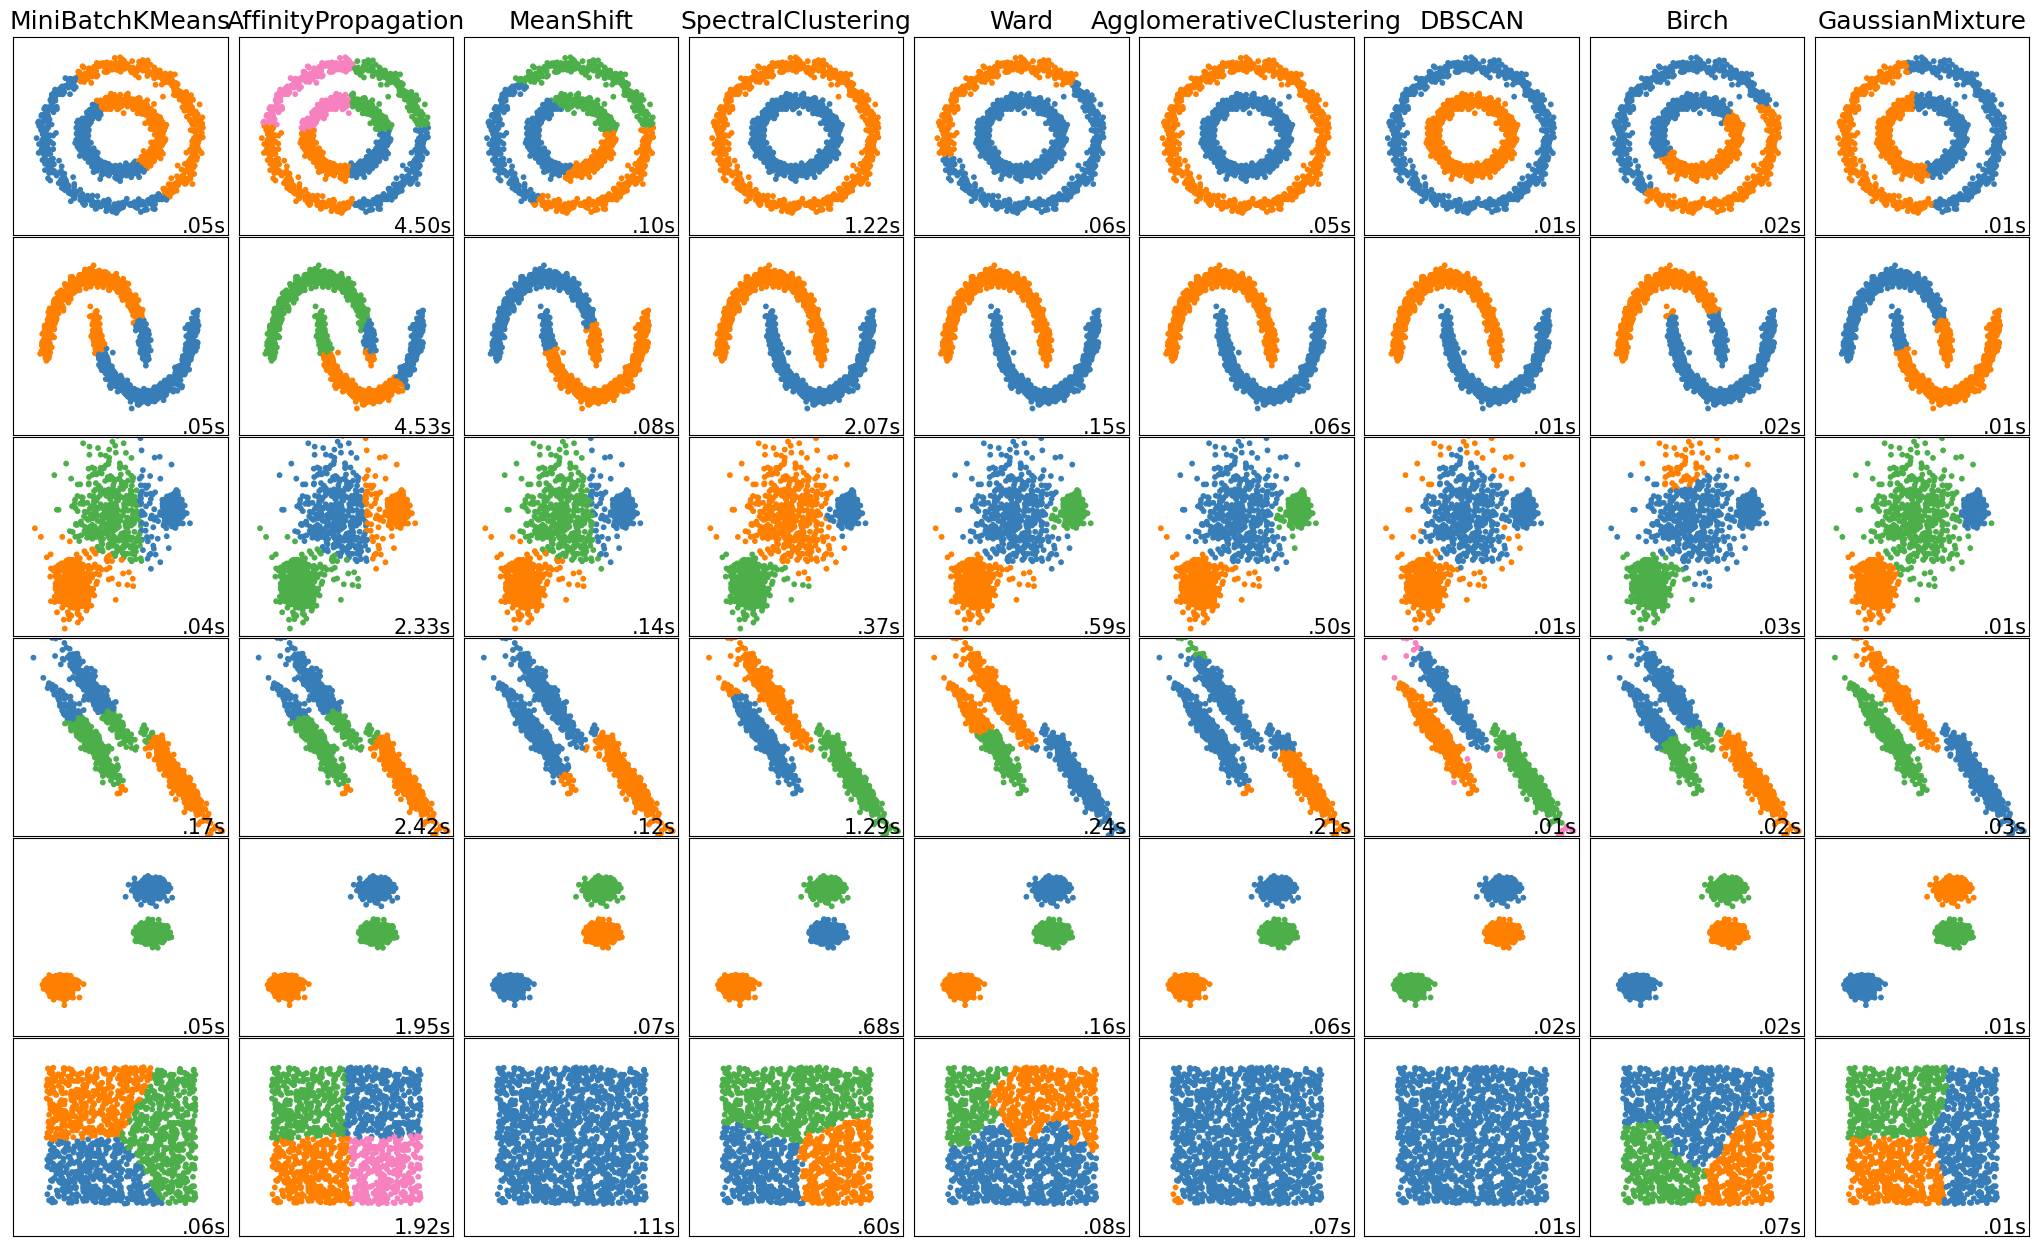

In [84]:
# Running and plotting

import time

from sklearn.neighbors import kneighbors_graph
from sklearn import cluster, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1


for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1


plt.show()

## Quiz time: take a few moments and explore the results - what do you notice? 

Really... write down some points here (and even better send them to slack!):

- point 1
- point 2




NOTE: The last dataset is an example of a 'null' situation for clustering, i.e. the data is homogeneous. 


## Some take-away points

<br>
<details>
    <summary> An indicative list: </summary>
<ul>
    <li> There is not a single best algorithm. 
    <li> Not all the algorithms identify the same number of clusters.
    <li> Some algorithms are better to detect arbitrary cluster shapes than others.
    <li> Some algorithms can be faster.
    <li> The intuitive clustering might not apply to very high dimensional data.
</ul>
</details>

# Exercise: Classify Star-forming objects in a BPT diagram

The "Baldwin, Phillips & Terlevich" (BPT) diagrams are used to distinguish sources based on specific spectral emission lines. The strengths of these lines depend on the heating source (see e.g. [BPT diagram, NED](https://ned.ipac.caltech.edu/level5/Glossary/Essay_bpt.html)).

BPTs allow to distinguish:
- AGNs (Seyfert)
- LINERs
- Star-forming galaxies
- Composite objects

<center><img src="images/BPT.png"> 
Figure 10.1. Example of classification via BPT diagram.<br> Theoretical or observationally-calibrated curves allow to distinguish the different subpopulations.<br>
(From <a href="https://ui.adsabs.harvard.edu/abs/2010ApJ...720..555P/abstract" target="_blank" rel="noopener noreferrer"> Parra et al. (2010), ApJ, 720, 555</a>)</center>

## The sample

We will use the data by [Stampoulis et al. (2019), MNRAS, 485, 1085](https://ui.adsabs.harvard.edu/abs/2019MNRAS.485.1085S/abstract), which provides the OIII, NII, SII, and OI diagnostics for ~130 000 objects.

The work also gives classifications, which we will use as a reference.

--- 

**TASK 1: Find the best clustering algorithm for separating star-forming objects**

**TASK 2: Plot results and check consistency with BPT theoretical curves**

**CHALLENGE: Consult the sklearn's pages to tune more hyperparameters!**

## Loading and setting up the data

In [85]:
# CREATING DATA STRUCTURE

# > Loading the emission line data and classifications from Stampoulis+19:

PATH_Stampoulis_data = "data/Stampoulis+19_Table_2.csv"

data = np.genfromtxt(PATH_Stampoulis_data, delimiter=",")
# The data file is organized in 138799 lines (i.e. different objects), and 12 columns

# To check file dimensions:
# print(data.shape)

ID               = data[:,0]  # object ID
NII_diagnostic   = data[:,3]  # log10 ( NII_6584  / H_alpha )
SII_diagnostic   = data[:,4]  # log10 ( SII_6717  / H_alpha )
OI_diagnostic    = data[:,5]  # log10 ( OI        / H_alpha )
OIII_diagnostic  = data[:,6]  # log10 ( OIII_5007 / H_beta )

labels = np.genfromtxt(PATH_Stampoulis_data, delimiter=',', usecols=-1, dtype=str)
# reading labels from last column
# Activity class labelling scheme:
#   0 <-> SFG (Star Forming Galaxy)
#   1 <-> SEY (Seyfert)
#   2 <-> LIN (LINER)
#   3 <-> COM (Composite)

# Dictionary containg class name and associated label:
from collections import OrderedDict
classes = OrderedDict()
classes["SFG"] = 0
classes["SEY"] = 1
classes["LIN"] = 2
classes["COM"] = 3

labels = [int(float(label)) for label in labels]
# converting labels from strings to integers

# > Organizing data in an analysis-ready fashion:
X_sample = np.stack((OIII_diagnostic,NII_diagnostic,SII_diagnostic,OI_diagnostic),axis=-1)
y_sample = labels

We will use only 1 every "sampling_factor" objects for two reasons:

- to speed up the exercise
- to avoid crashes due to memory limitations.

You can try to use the full sample when confident with the setup (and your computer power!).

In [86]:
# SUGGESTION: Use only 1 every <sampling_factor> objects 

sampling_factor = 50
# sample 1 every <sampling_factor> data to avoid computational delay

X = X_sample[::sampling_factor]
y = y_sample[::sampling_factor]

print('Sample shape:')
print("_____________________________________")
print('  X  | ' + str(X.shape))
print('     | ' + str(X.shape[0]) + ' samples x ' + str(X.shape[1]) + ' diagnostics' )
print("-----|-------------------------------")
print('  y  | ' + str(len(y)) + ' labels')

Sample shape:
_____________________________________
  X  | (2616, 4)
     | 2616 samples x 4 diagnostics
-----|-------------------------------
  y  | 2616 labels


Although available, we will not use the labels for the analysis, but only for the first representation of the data.

## Visualizing the data
Essentially reproducing Figure 5 in Stampoulis+ 2019

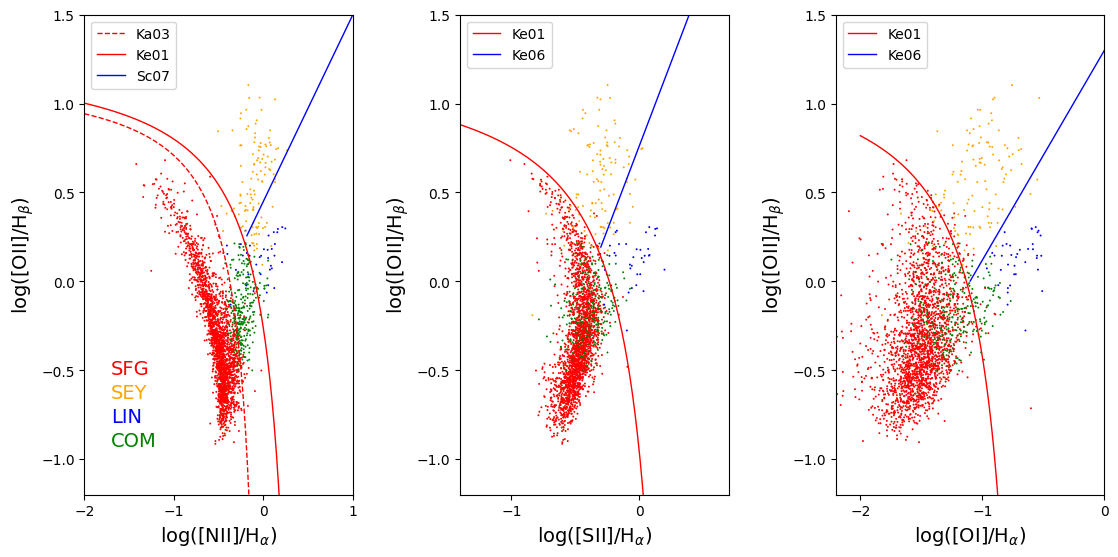

In [88]:
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from matplotlib import colors

# Limit scatter plots (not histograms) in showing a maximum of <N_plot> objects:
# for full sample size, use: N_plot = len(X)
N_plot = 5000
# NOTE: reducing the sample in the plot helps visualizing the density

# Creating a colormap where:
#   red    <-> SFG
#   yellow <-> SEY
#   blue   <-> LIN
#   green  <-> COM
cmap = mpl.colors.ListedColormap(['red','orange','blue','green'])

# Remeber that the sample X is organized as:
#  X[:,0] <-> OIII_diagnostic
#  X[:,1] <-> NII_diagnostic
#  X[:,2] <-> SII_diagnostic
#  X[:,3] <-> OI_diagnostic


# PLOT THE DIAGNOSITCS

# > Classification lines
#   NII:
x1 = np.linspace(-2, 0.05, 100)
x2 = np.linspace(-2, 0.47, 100)
x3 = np.linspace(-0.1839, 1)
ke01_NII = 0.61 / (x1-0.05) + 1.3   # Kewley+01
ka03_NII  = 0.61 / (x2-0.47) + 1.19 # Kuffmann+03
sc07_NII  = 1.05 * x3 + 0.45        # Schawinski+07
#   SII:
x4 = np.linspace(-2, 0.05, 100)
x5 = np.linspace(-0.3, 1)
ke01_SII  = 0.72 / (x4-0.32) + 1.3  # Kewley+01
ke06_SII  = 1.89 * x5 + 0.76        # Kewley+06
#   OI:
x6 = np.linspace(-2, -0.8, 100)
x7 = np.linspace(-1.1, 0)
ke01_OI = 0.72 / (x6+0.59) + 1.33  # Kewley+01
ke06_OI = 1.18 * x7 + 1.30         # Kewley+06

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0, left=0.1, right=0.95, wspace=0.4)

ylim = [-1.2,1.5] # OIII_diagnostic range

# > left plot

xlim = [-2,1] # NII_diagnostic range

ax = fig.add_subplot(131)
im = ax.scatter(X[:, 1], X[:, 0], c=y, s=2, lw=0, cmap=cmap, zorder=2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.set_xlabel('log([NII]/H$_{α})$', fontsize=14)
ax.set_ylabel('log([ΟII]/H$_{β})$', fontsize=14)
#
ax.plot(x1, ka03_NII, "--", color='red',  linewidth = 1.0, label='Ka03')
ax.plot(x2, ke01_NII, "-",  color='red',  linewidth = 1.0, label='Ke01')
ax.plot(x3, sc07_NII, "-",  color='blue', linewidth = 1.0, label='Sc07')
ax.legend()

# legend:
ax.text(0.1,0.25, "SFG", color='red',    transform=ax.transAxes, fontsize=14)
ax.text(0.1,0.20, "SEY", color='orange', transform=ax.transAxes, fontsize=14)
ax.text(0.1,0.15, "LIN", color='blue',   transform=ax.transAxes, fontsize=14)
ax.text(0.1,0.10, "COM", color='green',  transform=ax.transAxes, fontsize=14)

# > central plot

xlim = [-1.4,0.7] # SII_diagnostic range

ax = fig.add_subplot(132)
im = ax.scatter(X[-N_plot:, 2], X[-N_plot:, 0], c=y[-N_plot:], s=2, lw=0, cmap=cmap, zorder=2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.set_xlabel('log([SII]/H$_{α})$', fontsize=14)
ax.set_ylabel('log([ΟII]/H$_{β})$', fontsize=14)
#
ax.plot(x4, ke01_SII, "-",  color='red',  linewidth = 1.0, label='Ke01')
ax.plot(x5, ke06_SII, "-",  color='blue', linewidth = 1.0, label='Ke06')
ax.legend()


# > right plot

xlim = [-2.2,0.0] # OI_diagnostic range

ax = fig.add_subplot(133)
im = ax.scatter(X[-N_plot:, 3], X[-N_plot:, 0], c=y[-N_plot:], s=2, lw=0, cmap=cmap, zorder=2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.set_xlabel('log([OI]/H$_{α})$', fontsize=14)
ax.set_ylabel('log([ΟII]/H$_{β})$', fontsize=14)
#
ax.plot(x6, ke01_OI, "-",  color='red',  linewidth = 1.0, label='Ke01')
ax.plot(x7, ke06_OI, "-",  color='blue', linewidth = 1.0, label='Ke06')
ax.legend()


plt.show()

# NOTE: Ignore the warning, due to the plotting of the lines

## Running clustering algorithms and plotting

<Figure size 2100x800 with 0 Axes>

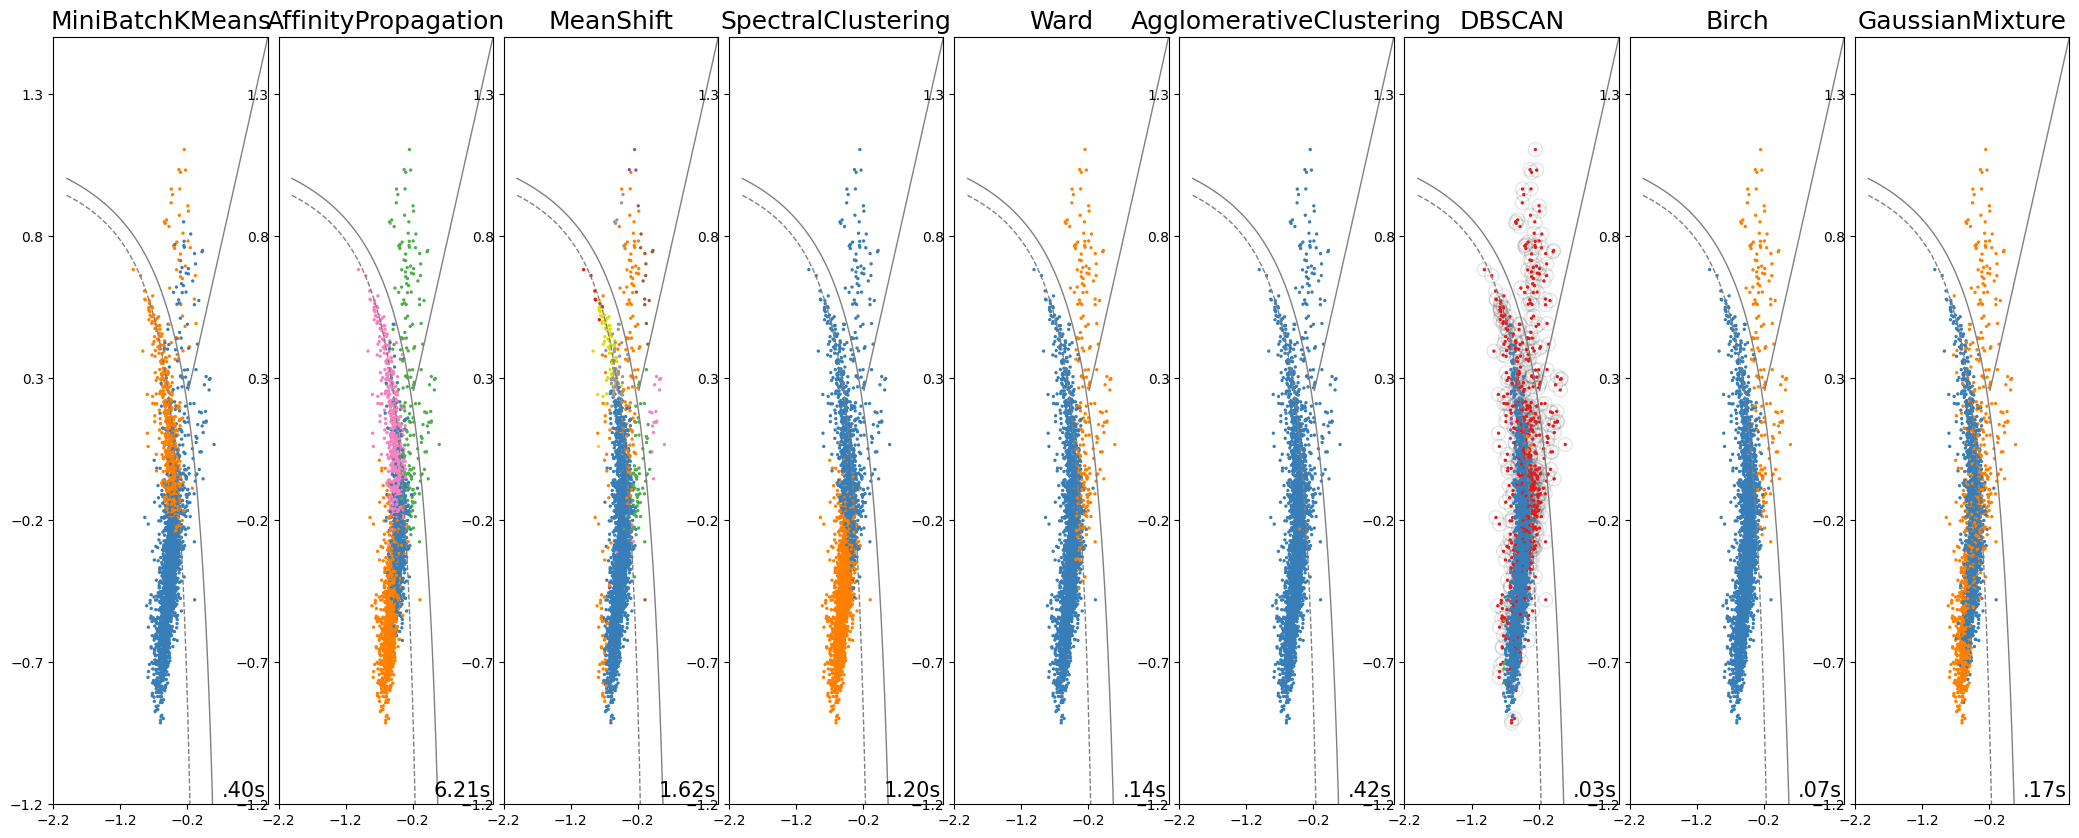

In [90]:
import time

from sklearn.neighbors import kneighbors_graph
from sklearn import cluster, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

plt.figure(figsize=(9 * 2 + 3, 8))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

# Setting up clustering parameters

params = {'quantile': .08,
            'eps': .4,
            'damping': .9,
            'preference': -600,
            'n_neighbors': 10,
            'n_clusters': 2}

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
k_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)
average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)
complete_linkage = cluster.AgglomerativeClustering(
    linkage="complete", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)
spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=params['eps'])
affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])
birch = cluster.Birch(n_clusters=params['n_clusters'])
gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')

clustering_algorithms = (
    ('MiniBatchKMeans', k_means),
    ('AffinityPropagation', affinity_propagation),
    ('MeanShift', ms),
    ('SpectralClustering', spectral),
    ('Ward', ward),
    ('AgglomerativeClustering', average_linkage),
    ('DBSCAN', dbscan),
    ('Birch', birch),
    ('GaussianMixture', gmm)
)

# restoring normalization for plotting
X_plot = X_sample[::sampling_factor]

for name, algorithm in clustering_algorithms:
    t0 = time.time()

    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(X)
        
    plt.subplot(1, len(clustering_algorithms), plot_num)
    plt.title(name, size=18)

    plt.plot(x1, ka03_NII, "--", color='grey',  linewidth = 1.0, label='Ka03')
    plt.plot(x2, ke01_NII, "-",  color='grey',  linewidth = 1.0, label='Ke01')
    plt.plot(x3, sc07_NII, "-",  color='grey', linewidth = 1.0, label='Sc07')
    
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X_plot[:, 2], X_plot[:, 0], s=2, color=colors[y_pred])
    plt.scatter(X_plot[y_pred==-1,2], X_plot[y_pred==-1,0], s=100, facecolors='none', edgecolors='black', color='black', label='background', alpha=0.1, zorder=0)
    # marking background class for DBSCAN

    plt.gca().set_xlim(-2,1)     # NII_diagnostic range
    plt.gca().set_ylim(-1.2,1.5) # OIII_diagnostic range

    plt.xticks(np.arange(xlim[0], xlim[1], step=1))
    plt.yticks(np.arange(ylim[0], ylim[1], step=0.5))

    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
             transform=plt.gca().transAxes, size=15,
             horizontalalignment='right')
    plot_num += 1


plt.show()

## Question: Which algorithm performs best?
<br>
<details>
<summary>Click for answer</summary>
The Ward algorithm seems to be the best in separating Star-Forming Galaxies.

Other algorithms (e.g. Affinity Propagation) might be considered valid if we join some clusters.
</details>


# Further notes / resources

For the description of some other algorithms as well as some applications in astrophysical problems, take a look at the [Summer School for Astrostatistics 2022 material](https://github.com/astrostatistics-in-crete/2022_summer_school).